# 9 - Data Visualization

In [1]:
import pandas as pd

import plotly.express as px

from wordcloud import WordCloud

import matplotlib.pyplot as plt

In [2]:
dictionary = {1 : "Internet Connection (Follow-Up)",
              2 : "Spam Message",
              3 : "Direct Message",
              4 : "News",
              5 : "Globe's Marketing Campaign with a Celebrity",
              6 : "Internet Connection (General)",
              7 : "Customer Service",
              8 : "Bills and Payments",
              9 : "Internet Speed",
              10 : "Internet Connection (Follow-Up)",
              11 : "Area Internet Outage", # Modem LOS Blink Red Light
              12 : "Filipino Stop Words",
              13 : "Mobile Services",
              14 : "Technical Support",
              15 : "Converge's News"}

In [3]:
df = pd.read_csv("outputs/tpod/tpod_sample.csv")

In [4]:
df["date"] = pd.to_datetime(df["date"])

In [5]:
df["week"] = df["date"].dt.isocalendar().week

## Top 10 Topics of the Corpus

In [6]:
tpoc = pd.read_csv("outputs/tpoc.csv")

In [7]:
tpoc = tpoc.sort_values(by = "topic_proportion", ascending = False)

In [8]:
tpoc["label"] = tpoc["k"].apply(lambda x: dictionary[x])

In [9]:
tpoc.head(10)

k  topic_proportion                            label
0    1          0.364168  Internet Connection (Follow-Up)
6    7          0.092334                 Customer Service
13  14          0.075686                Technical Support
5    6          0.068013    Internet Connection (General)
7    8          0.067825               Bills and Payments
2    3          0.058178                   Direct Message
12  13          0.051523                  Mobile Services
9   10          0.050876  Internet Connection (Follow-Up)
10  11          0.034104             Area Internet Outage
11  12          0.033044              Filipino Stop Words

In [10]:
round(df.pivot_table(values = "tweet_id", index = "topic_k", aggfunc = "count") / len(df) * 100, 2).sort_values(by = "tweet_id", ascending = False).head(10)

tweet_id
topic_k           
topic_1      66.15
topic_3       5.91
topic_11      4.60
topic_7       3.60
topic_10      2.96
topic_6       2.90
topic_13      2.30
topic_14      2.22
topic_12      2.20
topic_8       2.00

In [11]:
df[df["topic_k"] == "topic_15"].groupby("company_c").count()

date  content  tweet_id  user_username  conversation_id  content_1  \
company_c                                                                       
0           373      373       373            373              373        373   
1            91       91        91             91               91         91   

           company_a  company_b  company  content_2  ...  topic_8  topic_9  \
company_c                                            ...                     
0                373        373      373        373  ...      373      373   
1                 91         91       91         91  ...       91       91   

           topic_10  topic_11  topic_12  topic_13  topic_14  topic_15  \
company_c                                                               
0               373       373       373       373       373       373   
1                91        91        91        91        91        91   

           topic_k  week  
company_c                 
0              373   373  
1               91    91  

[2 rows x 39 columns]

In [12]:
df[df["topic_k"] == "topic_15"].groupby("company_b").count()

date  content  tweet_id  user_username  conversation_id  content_1  \
company_b                                                                       
0           360      360       360            360              360        360   
1           104      104       104            104              104        104   

           company_a  company_c  company  content_2  ...  topic_8  topic_9  \
company_b                                            ...                     
0                360        360      360        360  ...      360      360   
1                104        104      104        104  ...      104      104   

           topic_10  topic_11  topic_12  topic_13  topic_14  topic_15  \
company_b                                                               
0               360       360       360       360       360       360   
1               104       104       104       104       104       104   

           topic_k  week  
company_b                 
0              360   360  
1              104   104  

[2 rows x 39 columns]

In [13]:
df[df["topic_k"] == "topic_15"].groupby("company_a").count()

date  content  tweet_id  user_username  conversation_id  content_1  \
company_a                                                                       
0           195      195       195            195              195        195   
1           269      269       269            269              269        269   

           company_b  company_c  company  content_2  ...  topic_8  topic_9  \
company_a                                            ...                     
0                195        195      195        195  ...      195      195   
1                269        269      269        269  ...      269      269   

           topic_10  topic_11  topic_12  topic_13  topic_14  topic_15  \
company_a                                                               
0               195       195       195       195       195       195   
1               269       269       269       269       269       269   

           topic_k  week  
company_a                 
0              195   195  
1              269   269  

[2 rows x 39 columns]

## Time Series

In [14]:
topic_k = ["topic_1", "topic_2", "topic_3", "topic_4",
           "topic_5", "topic_6", "topic_7", "topic_8",
           "topic_9", "topic_10", "topic_11", "topic_12",
           "topic_13", "topic_14", "topic_15"]

### Bastani et al. (2019) 3.4. Topic popularity over time

[Latent Dirichlet allocation (LDA) for topic modeling of the CFPB consumer complaints](https://doi.org/10.1016/j.eswa.2019.03.001)

1. For each document, get the `5` highest topic proportion of it.
2. For each topic, get the average of it in a given month.

However, in the codes, we get all of the topic proportion of instead the `5` highest topic proportion of each document.

#### Month

In [15]:
ts_1_month = round(df.pivot_table(values = topic_k, index = "month", aggfunc = "mean") * 100, 2).reset_index()

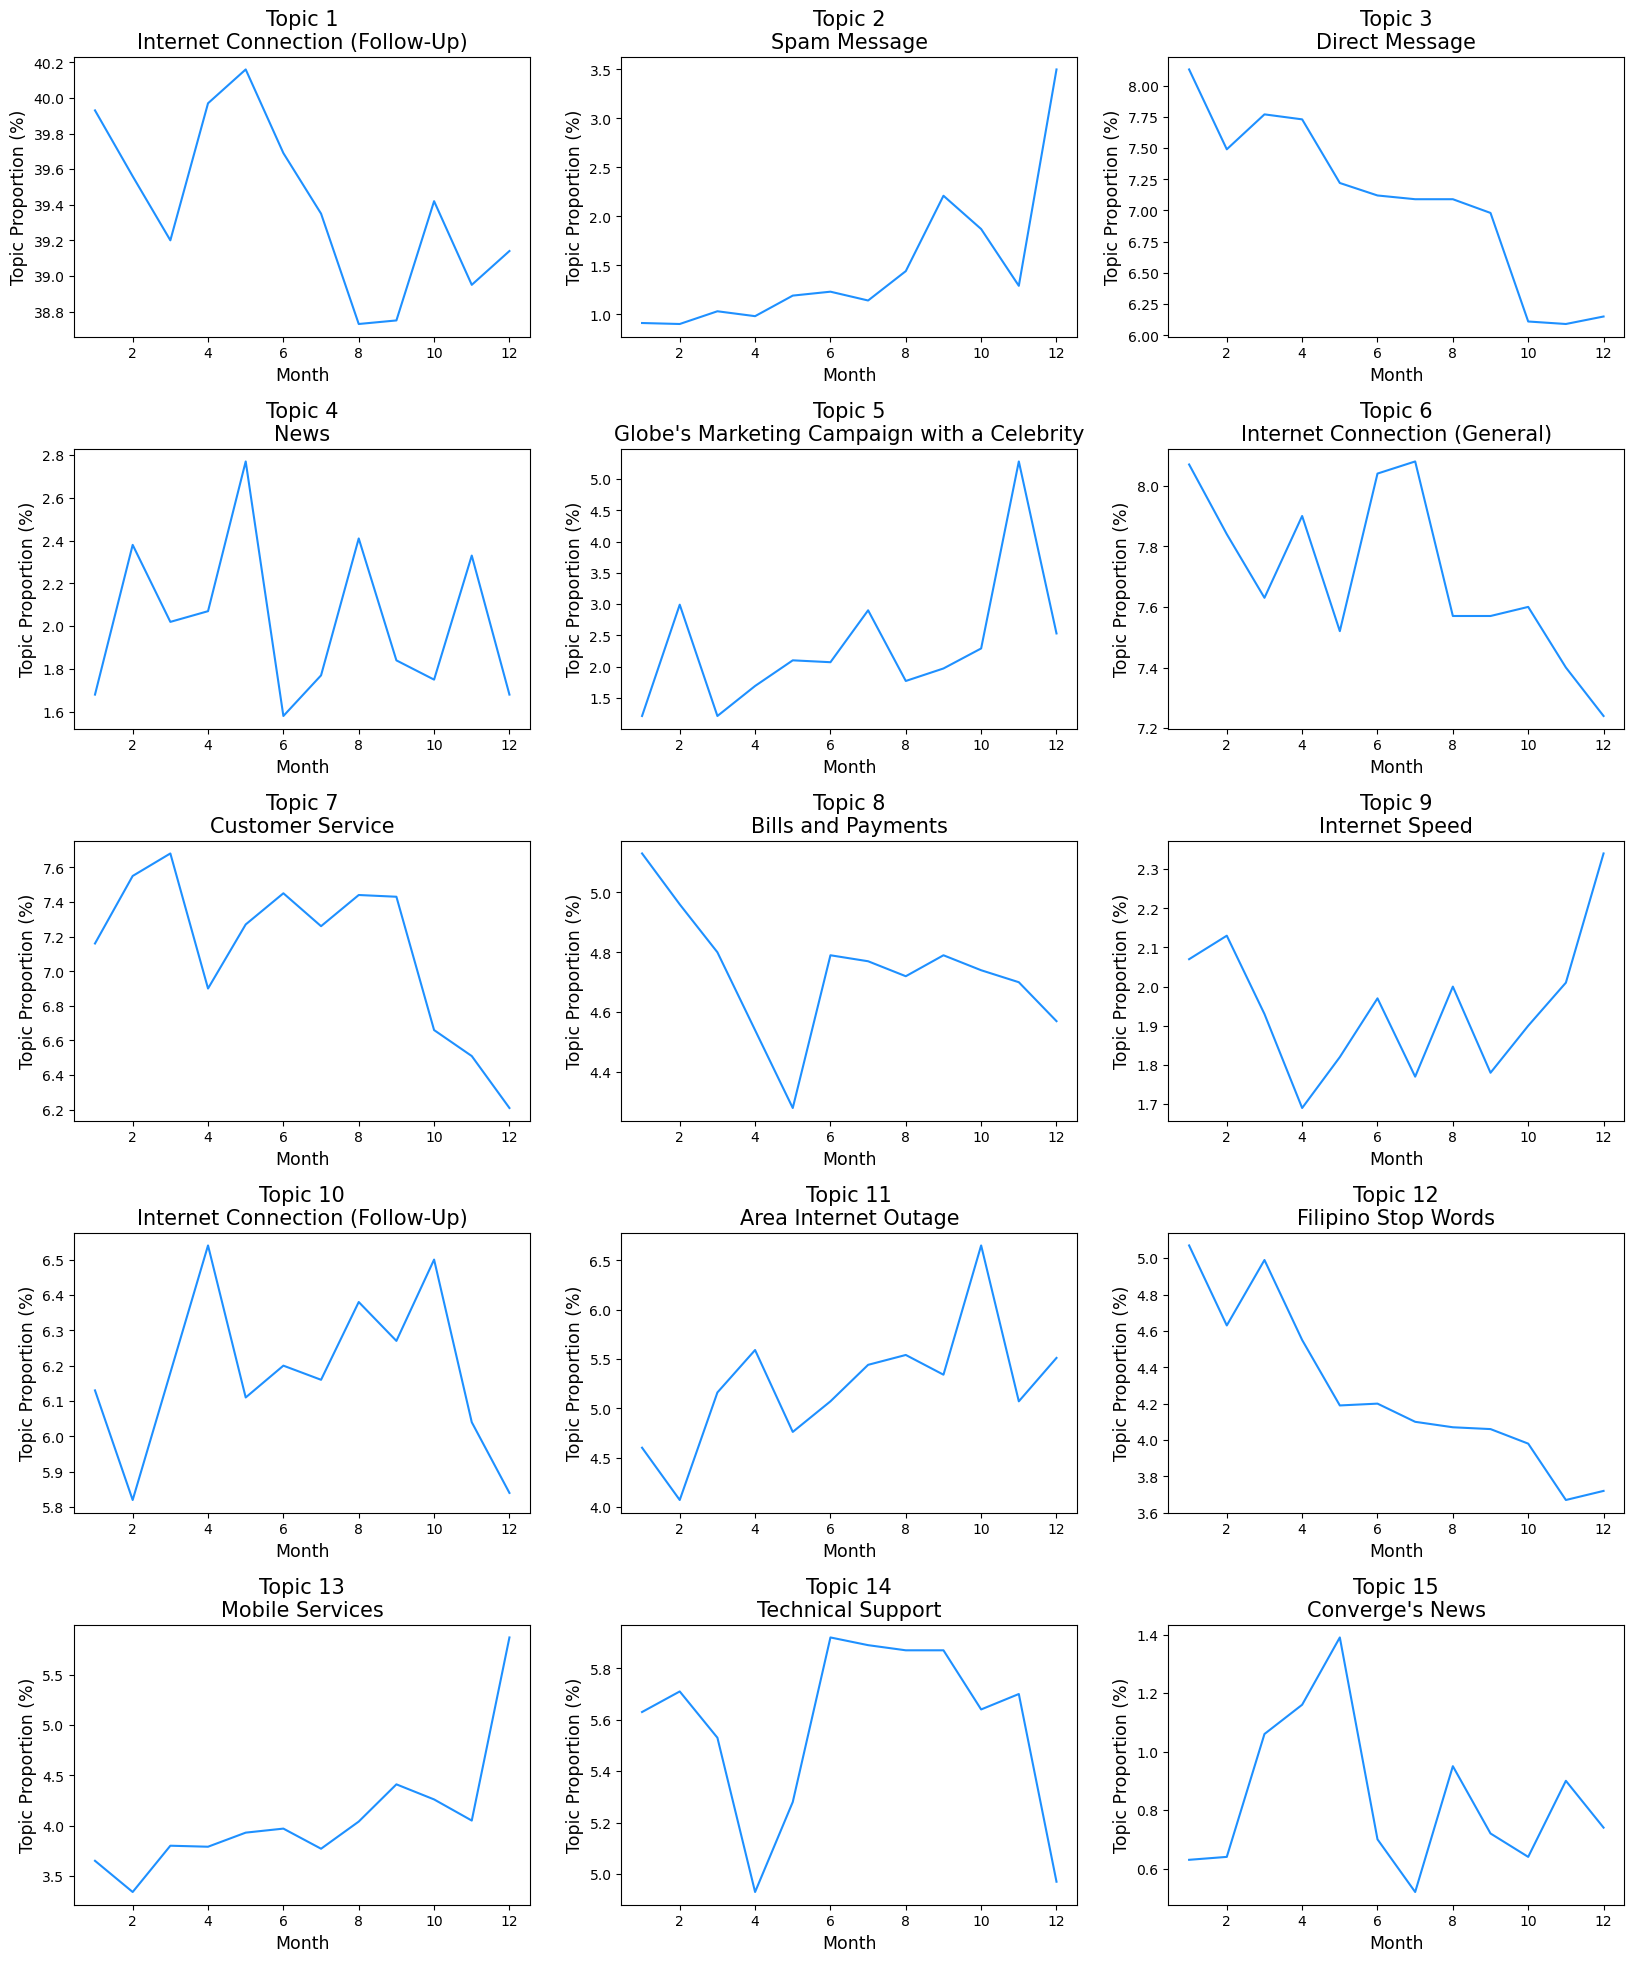

In [16]:
# define the number of rows and columns for the subplot grid
num_rows = 5
num_cols = 3

# create the subplot grid
fig, axs = plt.subplots(num_rows, num_cols, figsize = (20, 24))

# loop over the topics and plot each one in a subplot
for idx, i in enumerate(topic_k):
    # calculate the row and column index for the current subplot
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    
    # plot the current topic in the current subplot
    axs[row_idx, col_idx].plot(ts_1_month["month"], ts_1_month[i], color="dodgerblue", label=i)
    axs[row_idx, col_idx].set_xlabel("Month", fontsize = 12.5)
    axs[row_idx, col_idx].set_ylabel("Topic Proportion (%)", fontsize = 12.5)
    axs[row_idx, col_idx].set_title(i.replace("_", " ").capitalize() + "\n" + dictionary[int(i.replace("topic_", ""))], fontsize = 15)
    
# adjust the spacing between subplots
plt.subplots_adjust(hspace = 0.4)

# show the plot
plt.show()

#### Week

In [17]:
ts_1_week = round(df.pivot_table(values = topic_k, index = "week", aggfunc = "mean") * 100, 2).reset_index()

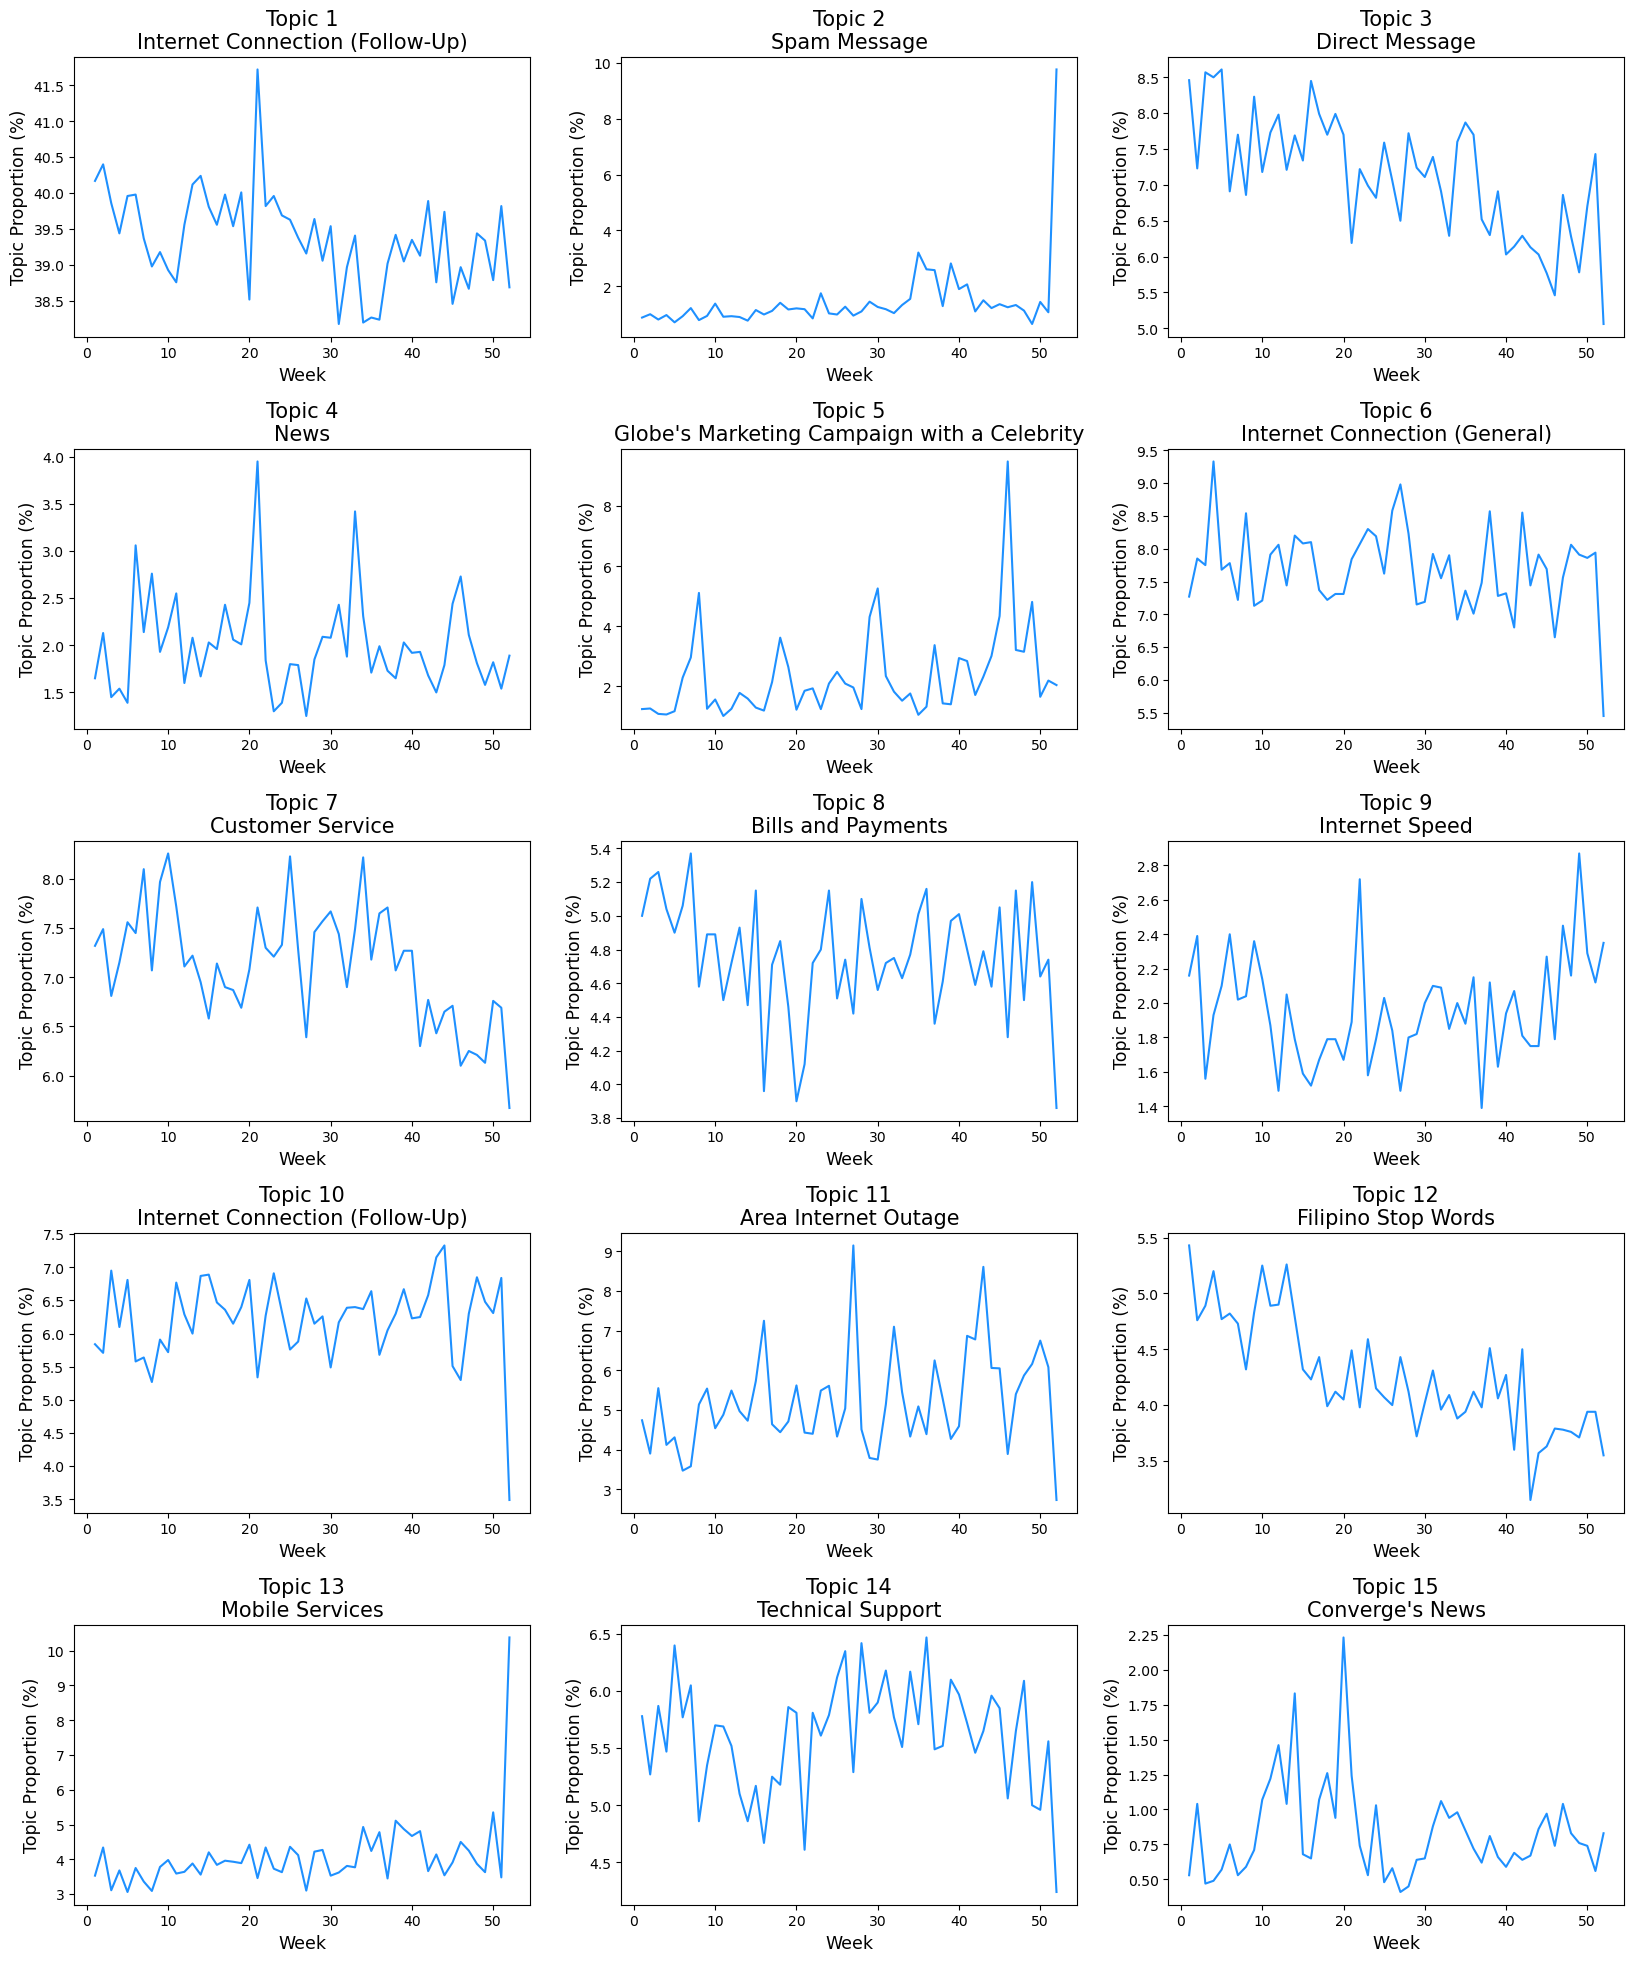

In [18]:
# define the number of rows and columns for the subplot grid
num_rows = 5
num_cols = 3

# create the subplot grid
fig, axs = plt.subplots(num_rows, num_cols, figsize = (20, 24))

# loop over the topics and plot each one in a subplot
for idx, i in enumerate(topic_k):
    # calculate the row and column index for the current subplot
    row_idx = idx // num_cols
    col_idx = idx % num_cols
    
    # plot the current topic in the current subplot
    axs[row_idx, col_idx].plot(ts_1_week["week"], ts_1_week[i], color="dodgerblue", label=i)
    axs[row_idx, col_idx].set_xlabel("Week", fontsize = 12.5)
    axs[row_idx, col_idx].set_ylabel("Topic Proportion (%)", fontsize = 12.5)
    axs[row_idx, col_idx].set_title(i.replace("_", " ").capitalize() + "\n" + dictionary[int(i.replace("topic_", ""))], fontsize = 15)
    
# adjust the spacing between subplots
plt.subplots_adjust(hspace = 0.4)

# show the plot
plt.show()

### Dahal et al. (2019) 4.3.2 Temporal analysis of the topics

[Topic modeling and sentiment analysis of global climate change tweets](https://doi.org/10.1007/s13278-019-0568-8)

1. For each document, get the `1` highest topic proportion of it.
2. For each month, get the count of each topic.
3. Divide the count by the count of all topics in a given month to get the topic proportion in percentage.

In [19]:
ts_2 = round(df.pivot_table(values = "tweet_id", index = ["month", "topic_k"], aggfunc = "count") / 7218 * 100, 2).reset_index() #

In [20]:
for i in topic_k:
    
    ts_k = ts_2[ts_2["topic_k"] == i] #
    
    px.line(x = ts_k["month"],
               y = ts_k["tweet_id"], #
               labels = {"x" : "Month", "y" : "Topic Proportion (%)"},
               # trendline = "ols",
               title = i.replace("_", " ").capitalize() + ": "+ dictionary[int(i.replace("topic_", ""))],
               width = 600,
               height = 400).show()

In [21]:
for i in topic_k:
    
    ts_k = ts_2[ts_2["topic_k"] == i] #
    
    px.line(x = ts_k["month"],
            y = ts_k["tweet_id"], #
            labels = {"x" : "Month", "y" : "Topic Proportion (%)"},
            title = i.replace("_", " ").capitalize() + ": "+ dictionary[int(i.replace("topic_", ""))],
            width = 600,
            height = 400).show()

## Word Clouds

In [22]:
def Word_Cloud(path, figs, max_words, show_topic_k = True, use_dictionary = False, fonts = 20):
    
    df = pd.read_csv(path, index_col = 0).T
    
    K = len(df.columns)
    
    fig, axs = plt.subplots(K // 5, 5, figsize = figs, sharex = True, sharey = True, tight_layout = True)
    
    fig.subplots_adjust(top = 0.25, hspace = 0, wspace = 0)
    
    row = 0
    
    column = 0
    
    for k in range(K):
        
        # word clouds
        
        wordcloud = WordCloud(width = 300, height = 300, max_words = max_words, min_font_size = 12.5, stopwords = {"company"}, background_color = "white")
        
        wordcloud.generate_from_frequencies(df[k].to_dict())
        
        # word clouds' positions
        
        if k / 5 == 1: # if k is at the 6th index, then row starts at 2nd and column starts at 0th
            row, column = 1, 0
        elif k / 5 == 2: # else if k is at the 11th index, then row starts at 3rd and column starts at 0th
            row, column = 2, 0
        elif k / 5 == 3: # else if k is at the 16th index, then row starts at 4th and column starts at 0th
            row, column = 3, 0
        elif k / 5 == 4: # else if k is at the 21th index, then row starts at 5th and column starts at 0th
            row, column = 4, 0
        elif k / 5 == 5: # else if k is at the 26th index, then row starts at 6th and column starts at 0th
            row, column = 5, 0
            
        # use_dictionary and show_topic_k
        
        if use_dictionary is True:
            if show_topic_k is True:
                st = "Topic {0}\n{1}".format(str(k + 1), dictionary[k + 1])
            else:
                st = dictionary[k + 1]
        else:
            if show_topic_k is True:
                st = "Topic {0}".format(str(k + 1))
            else:
                st = ""
                
        if K / 5 == 1:
            axs[column].set_title(st, fontsize = fonts, weight = "semibold")
            axs[column].imshow(wordcloud)
            axs[column].set_axis_off()
        else:
            axs[row, column].set_title(st, fontsize = fonts, weight = "semibold")
            axs[row, column].imshow(wordcloud)
            axs[row, column].set_axis_off()
            
        column = column + 1

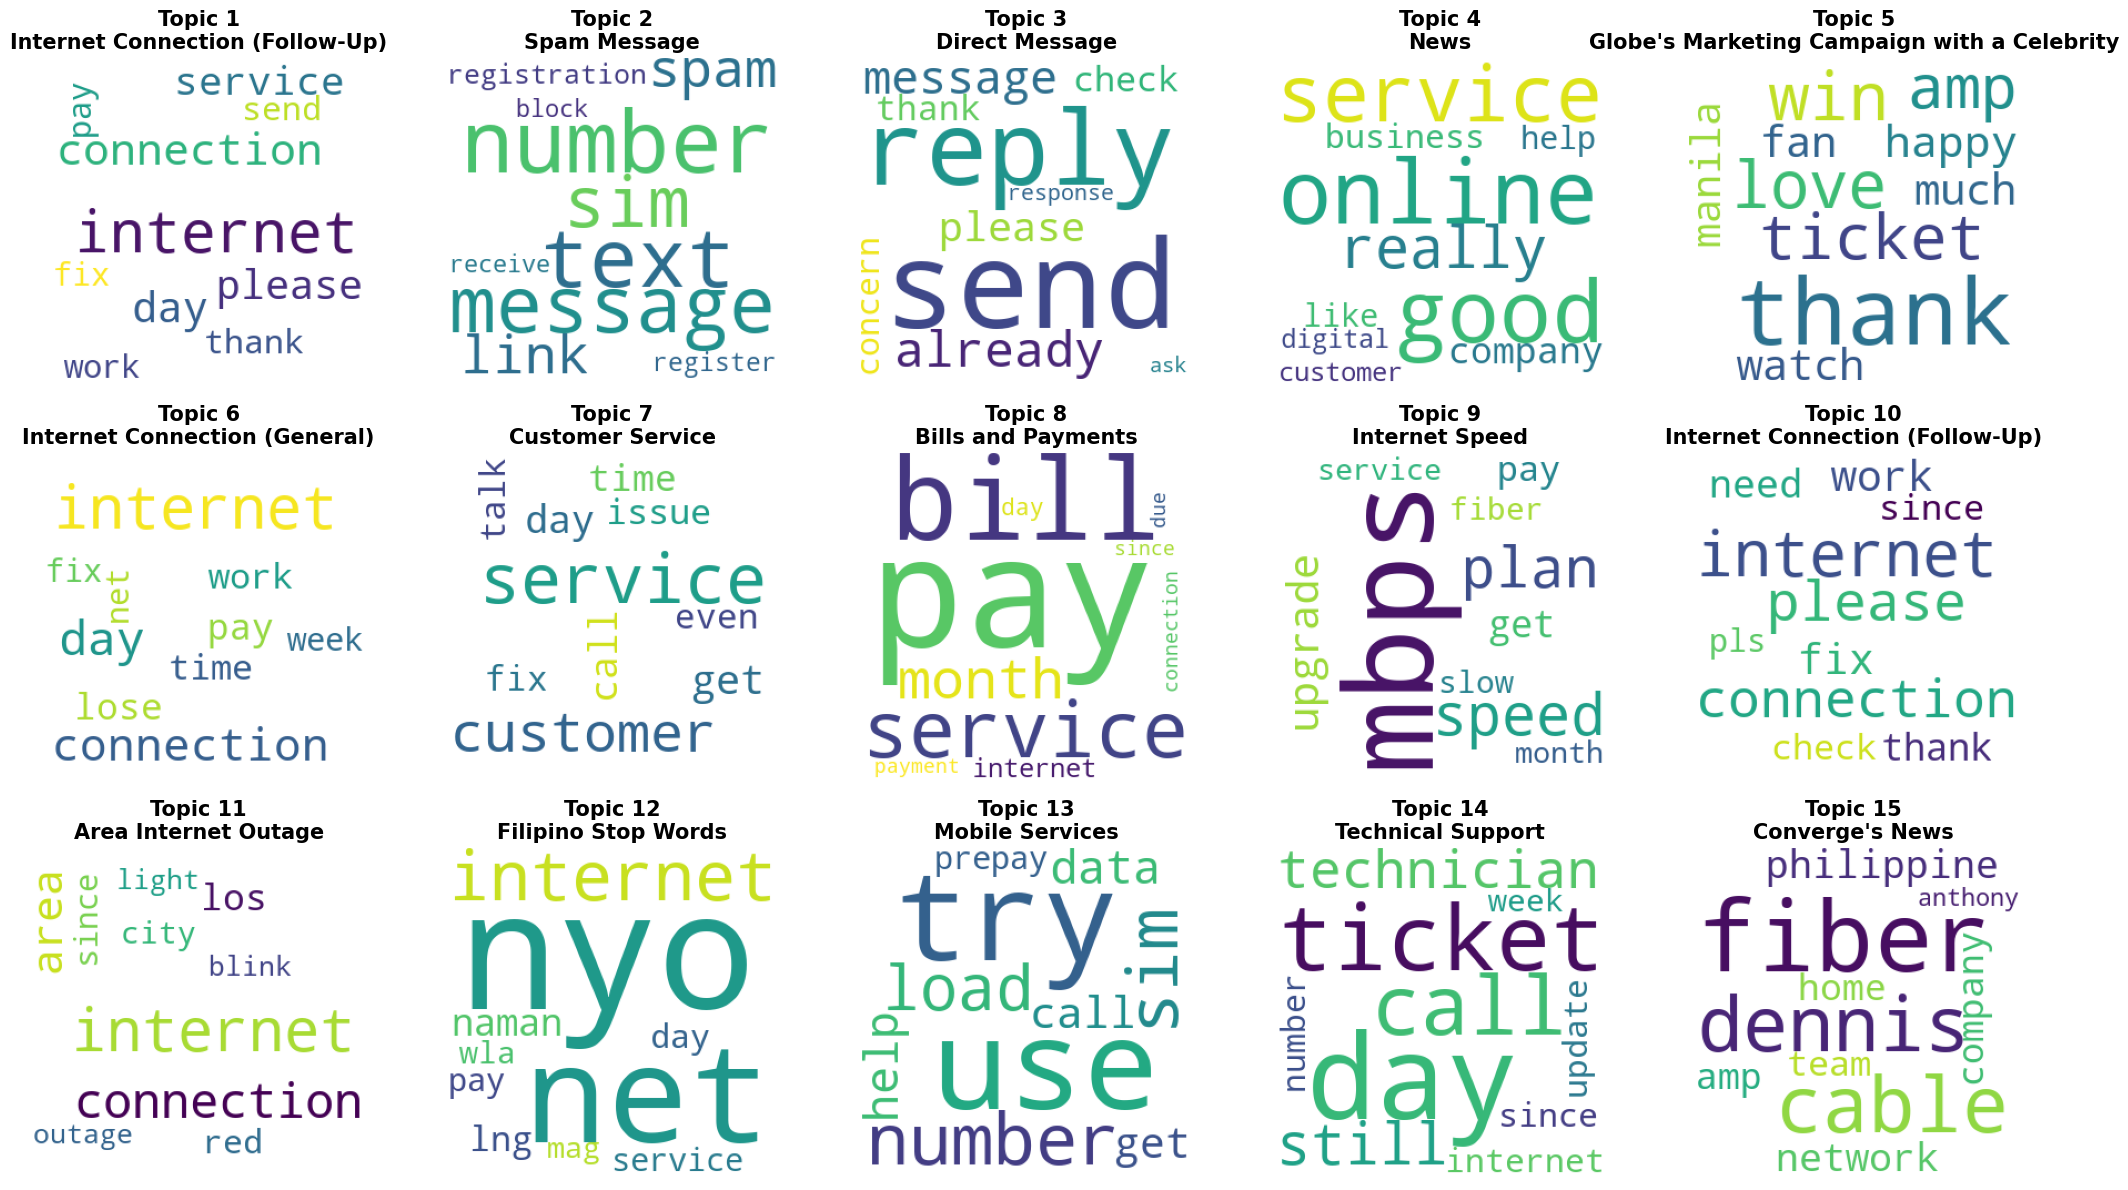

In [23]:
Word_Cloud(path = "outputs/btm/p_wz_k_15_a_250_e_0.001.csv", figs = (24, 12), max_words = 10, show_topic_k = True, use_dictionary = True, fonts = 15)

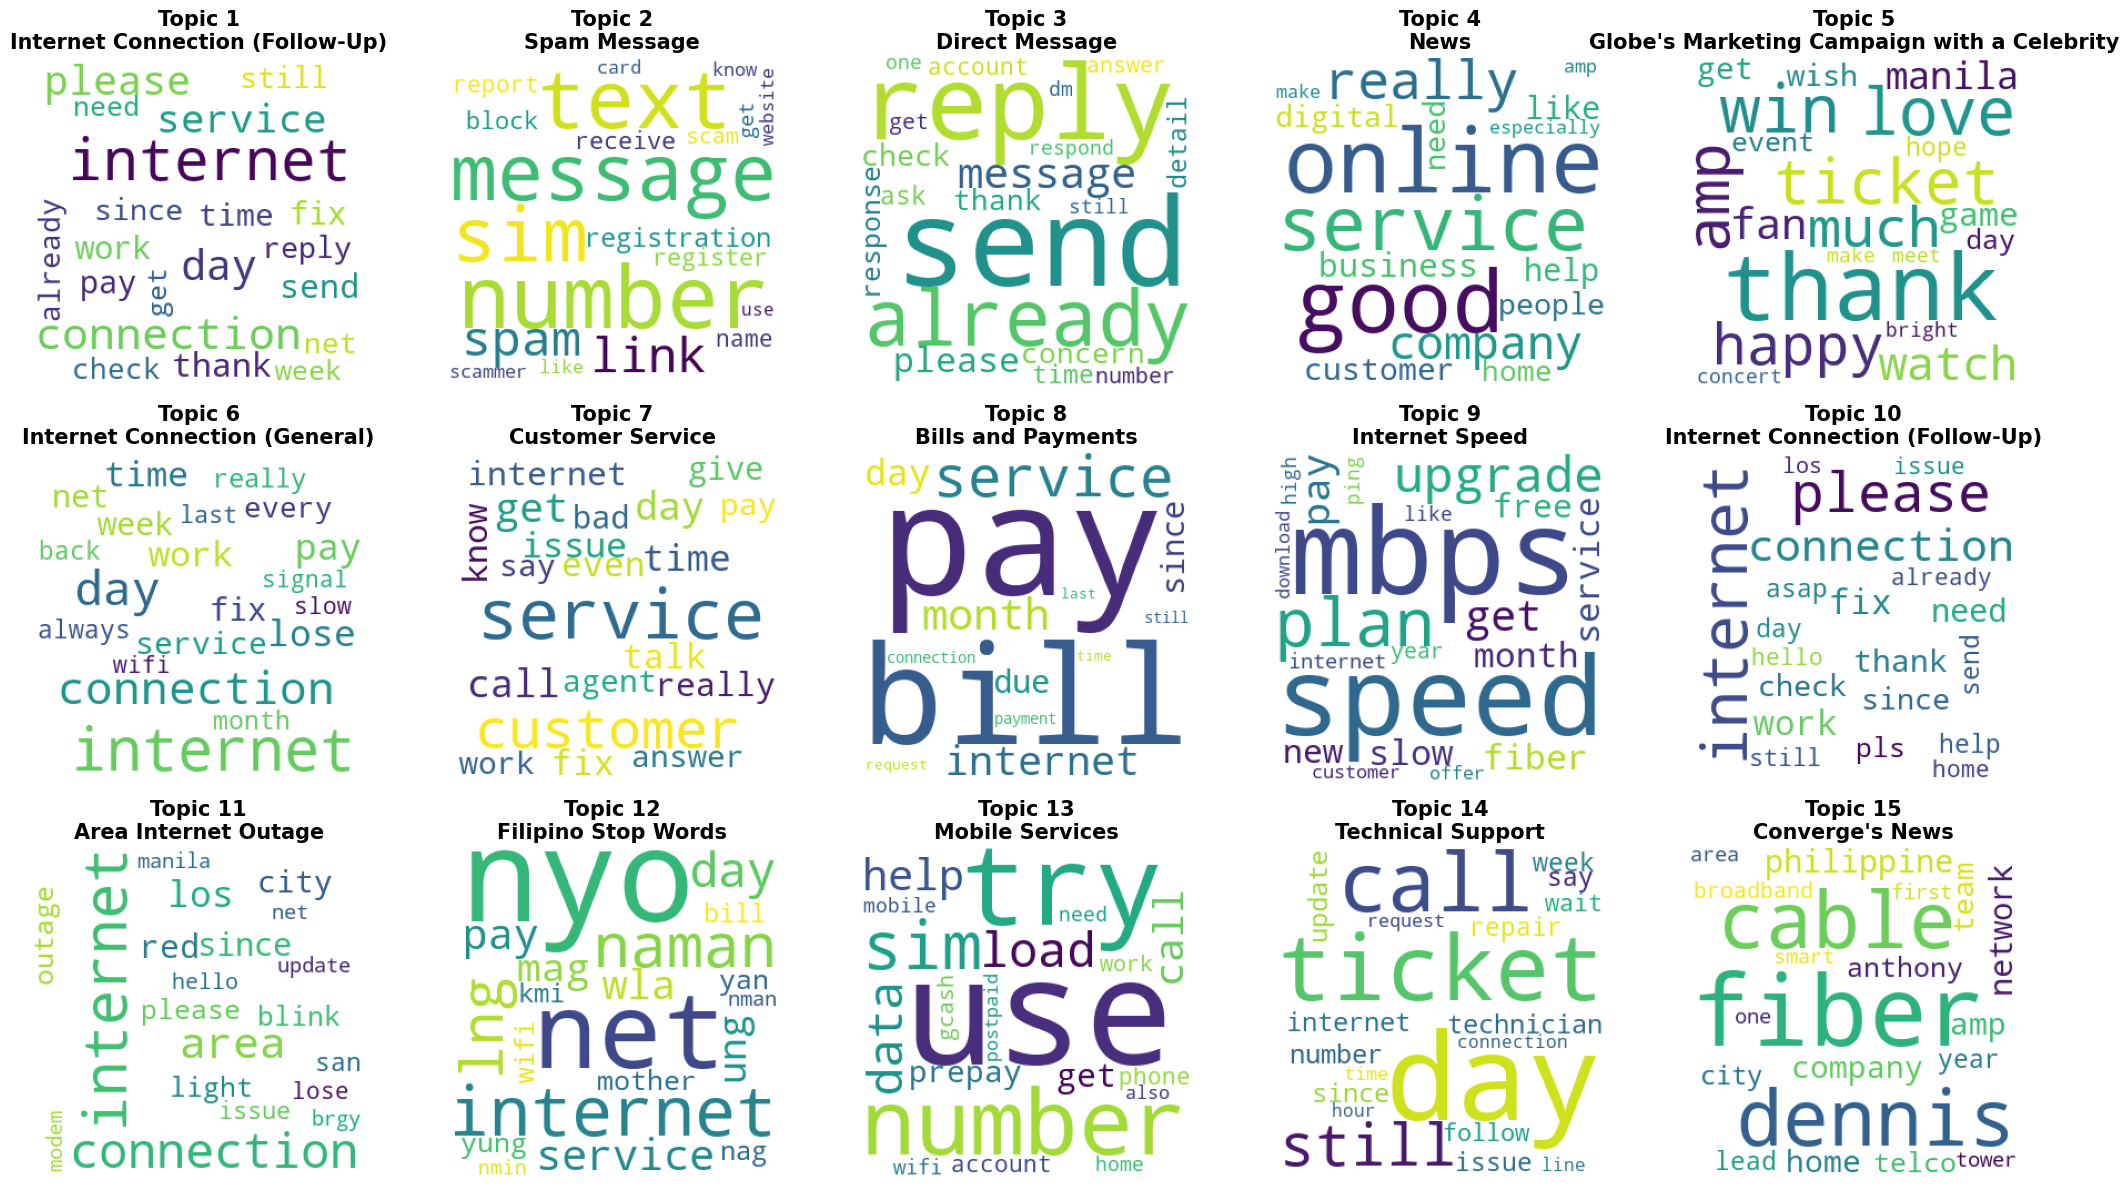

In [24]:
Word_Cloud(path = "outputs/btm/p_wz_k_15_a_250_e_0.001.csv", figs = (24, 12), max_words = 20, show_topic_k = True, use_dictionary = True, fonts = 15)